### Calculate peak distribution at 2 nt, 10 nt, 150nt, 

In [1]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
anno_gff=doc['annotation']
mRNA_peak_file = doc["mRNA_peak_file"]

tss_annotation = doc['tss_annotation']


import os
import time
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
from Homer import *
import helper
import create_output
print('Number of tissues: ',len(tissues))

('Number of tissues: ', 13)


In [ ]:
out_dir = "Results/peak_distribution"
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

In [ ]:
peak_windows = [5, 1, 10, 20, 50, 150]
t = time.time()
for t in tissues:
    for s in ["GROCap", "START"]:
        curr_f = glob.glob(os.path.join(data_folder, t, s, "f04_peaks/trim*"))
        for f in curr_f:

            tag_dir = os.path.join(data_folder, t, s, "f03_tags",
                                   os.path.basename(f).split("_and")[0])
            for pw in peak_windows:
                curr_out = (os.path.join(out_dir,
                                         t + "_" + s + "_" + str(pw) + ".tsv"))
                cmd = 'annotatePeaks.pl {} {} -size {} -len 0 -norm 1e6 -d {} > {}'.format(
                    f, ref_fa, pw, tag_dir, curr_out)
#                 cmd = 'annotatePeaks.pl {f} {gen} -size {pw} -len 0 -norm 1e6 -d {tag_dir} > {curr_out}'.format(
#                     f, ref_fa, pw, tag_dir,f, curr_out)
                print(cmd)
                !{cmd}
        
print("Seconds: %f" % (time.time-t))

annotatePeaks.pl /data/isshamie/TSS/NCBI_PICR_103_Processed/BMDM1hKLA/GROCap/f04_peaks/trim_BMDM1hKLA_GROCap1_and_trim_BMDM1hKLA_GRO1_bg_2.peak /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -size 5 -len 0 -norm 1e6 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/BMDM1hKLA/GROCap/f03_tags/trim_BMDM1hKLA_GROCap1 > Results/peak_distribution/BMDM1hKLA_GROCap_5.tsv

	Using Custom Genome
	Peak file = /data/isshamie/TSS/NCBI_PICR_103_Processed/BMDM1hKLA/GROCap/f04_peaks/trim_BMDM1hKLA_GROCap1_and_trim_BMDM1hKLA_GRO1_bg_2.peak
	Genome = GCF_003668045.1_CriGri-PICR_genomic.fna
	Organism = unknown
	Peak Region set to 5
	Fragment Length set to 0
	Will normalize tag counts to 1e6 per experiment
	Tag Directories:
		/data/isshamie/TSS/NCBI_PICR_103_Processed/BMDM1hKLA/GROCap/f03_tags/trim_BMDM1hKLA_GROCap1
	Peak/BED file conversion summary:
		BED/Header formatted lines: 0
		peakfile formatted lines: 97712
		Duplicated Peak IDs: 0

	Peak File Statistics:
		Total Peaks: 977

	Ratio for /data/isshamie/TSS/NCBI_PICR_103_Processed/BMDM1hKLA/GROCap/f03_tags/trim_BMDM1hKLA_GROCap1 : 0.132012138252088
	Organism: unknown
	Outputing Annotation File...
	Done annotating peaks file

annotatePeaks.pl /data/isshamie/TSS/NCBI_PICR_103_Processed/BMDM1hKLA/GROCap/f04_peaks/trim_BMDM1hKLA_GROCap1_and_trim_BMDM1hKLA_GRO1_bg_2.peak /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -size 50 -len 0 -norm 1e6 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/BMDM1hKLA/GROCap/f03_tags/trim_BMDM1hKLA_GROCap1 > Results/peak_distribution/BMDM1hKLA_GROCap_50.tsv

	Using Custom Genome
	Peak file = /data/isshamie/TSS/NCBI_PICR_103_Processed/BMDM1hKLA/GROCap/f04_peaks/trim_BMDM1hKLA_GROCap1_and_trim_BMDM1hKLA_GRO1_bg_2.peak
	Genome = GCF_003668045.1_CriGri-PICR_genomic.fna
	Organism = unknown
	Peak Region set to 50
	Fragment Length set to 0
	Will normalize tag counts to 1e6 per experiment
	Tag Directories:
		/data/isshamie/TSS/NCBI_PICR_103_Processed/BMDM1hKLA/GRO

	Ratio for /data/isshamie/TSS/NCBI_PICR_103_Processed/BMDMwt/GROCap/f03_tags/trim_BMDMwt_GROCap1 : 0.18858029400045
	Organism: unknown
	Outputing Annotation File...
	Done annotating peaks file

annotatePeaks.pl /data/isshamie/TSS/NCBI_PICR_103_Processed/BMDMwt/GROCap/f04_peaks/trim_BMDMwt_GROCap1_and_trim_BMDMwt_GRO1_bg_2.peak /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -size 10 -len 0 -norm 1e6 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/BMDMwt/GROCap/f03_tags/trim_BMDMwt_GROCap1 > Results/peak_distribution/BMDMwt_GROCap_10.tsv

	Using Custom Genome
	Peak file = /data/isshamie/TSS/NCBI_PICR_103_Processed/BMDMwt/GROCap/f04_peaks/trim_BMDMwt_GROCap1_and_trim_BMDMwt_GRO1_bg_2.peak
	Genome = GCF_003668045.1_CriGri-PICR_genomic.fna
	Organism = unknown
	Peak Region set to 10
	Fragment Length set to 0
	Will normalize tag counts to 1e6 per experiment
	Tag Directories:
		/data/isshamie/TSS/NCBI_PICR_103_Processed/BMDMwt/GROCap/f03_tags/trim_BMDMwt_GROCap1
	Pea

	Ratio for /data/isshamie/TSS/NCBI_PICR_103_Processed/BMDMwt/GROCap/f03_tags/trim_BMDMwt_GROCap1 : 0.18858029400045
	Organism: unknown
	Outputing Annotation File...


In [5]:
tissues[0]

'BMDM1hKLA'

In [26]:
tissues

['BMDM1hKLA',
 'BMDMwt',
 'Brain',
 'FemaleReproductive',
 'Heart',
 'Kidney',
 'Liver',
 'Lung',
 'MiscOrgans',
 'Muscle',
 'Pancreas',
 'Spleen',
 'CHO']

In [62]:
def load_density(t,s, peak_windows, data_folder=".", out_dir = "."):
    curr_f = glob.glob(os.path.join(data_folder, t, s, "f04_peaks/trim*"))
    for f in curr_f:
        #out = './bed_files/%s_annotate_%d.txt' % (f1,peak_windows[0])
        curr_out = (os.path.join(out_dir,
                     t + "_" + s + "_" + str(peak_windows[0]) + ".tsv"))

        density_df = pd.read_csv(curr_out,sep='\t',index_col=0)
        density_df.columns.values[-1] = peak_windows[0]
        density_df = density_df.loc[:,~(density_df.isnull().all())]
        for pw in peak_windows[1:]:
            curr_out = (os.path.join(out_dir,
                                     t + "_" + s + "_" + str(pw) + ".tsv"))

            tmp = pd.read_csv(curr_out,sep='\t',index_col=0)
            density_df[pw] = tmp[tmp.columns.values[-1]]
            
        density_df['log2 150-10'] = (np.log2((density_df.loc[:,150])/(density_df.loc[:,10])))
        density_df['log2 150-1'] = (np.log2((density_df.loc[:,150])/(density_df.loc[:,1])))
        density_df['log2 50-5'] = (np.log2((density_df.loc[:,50])/(density_df.loc[:,5])))
        density_df['log2 150-5'] = (np.log2((density_df.loc[:,150])/(density_df.loc[:,5])))
        density_df['log2 150-50'] = (np.log2((density_df.loc[:,150])/(density_df.loc[:,50])))

    return density_df

# def plot_density_ratio(df,col):
#     with sns.axes_style('ticks'):
#         plt.scatter(density_df['log2 150-10'],density_df['end'] - density_df['start'] + 1  - _peak_size,
#                    alpha=0.3,
#                    edgecolor='None',
#                    s=10)
#         plt.xlabel('log2(tags within 150bp/within10)')
#         plt.ylabel('Distance between modes of replicate peaks')
#         sns.despine()


In [63]:
density_df = load_density("CHO","GROCap",peak_windows,data_folder,out_dir)
density_df = density_df[~(density_df[5]==0)]
density_df = density_df[~(density_df[1]==0)]
density_df

,Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,5,1,10,20,50,150,log2 150-10,log2 150-1,log2 50-5,log2 150-5,log2 150-50
PeakID (cmd=annotatePeaks.pl /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f04_peaks/trim_CHO_GROCap2_and_trim_CHO_GRO2_bg_2.peak /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -size 5 -len 0 -norm 1e6 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap2),,,,,,,,,,,,,,,,,
NW_020822567.1-1,NW_020822567.1,9245193,9245198,-,843.500,0.959,789.93,272.15,816.86,826.28,830.37,843.18,0.045752,1.631439,0.072030,0.094116,0.022086
NW_020822603.1-1,NW_020822603.1,6596097,6596102,-,621.700,0.890,420.34,67.36,589.23,609.01,612.68,621.73,0.077457,3.206324,0.543577,0.564731,0.021154
NW_020822519.1-1,NW_020822519.1,30535385,30535390,+,536.800,0.896,463.37,2.69,482.73,483.38,484.50,501.68,0.055551,7.543017,0.064332,0.114603,0.050271
NW_020822601.1-1,NW_020822601.1,37658520,37658525,-,510.500,0.871,438.12,15.09,489.33,504.00,508.87,511.61,0.064237,5.083380,0.215971,0.223718,0.007747
NW_020822526.1-1,NW_020822526.1,20909150,20909155,+,501.700,0.980,360.68,2.60,485.24,490.49,497.50,501.68,0.048069,7.592112,0.463977,0.476048,0.012071
NW_020822616.1-1,NW_020822616.1,3344150,3344155,-,485.100,0.724,124.33,19.96,150.28,209.15,332.31,485.33,1.691313,4.603782,1.418355,1.964792,0.546436
NW_020822698.1-1,NW_020822698.1,4557080,4557085,-,461.500,0.942,419.87,17.13,443.41,445.04,445.83,463.84,0.064986,4.759030,0.086551,0.143685,0.057134
NW_020822439.1-1,NW_020822439.1,24407361,24407366,+,440.400,0.993,385.19,93.69,413.88,426.93,438.35,440.39,0.089569,2.232815,0.186513,0.193211,0.006698
NW_020822529.1-1,NW_020822529.1,45406582,45406587,-,423.400,0.367,121.68,9.05,147.22,169.92,192.48,391.69,1.411739,5.435651,0.661616,1.686620,1.025004


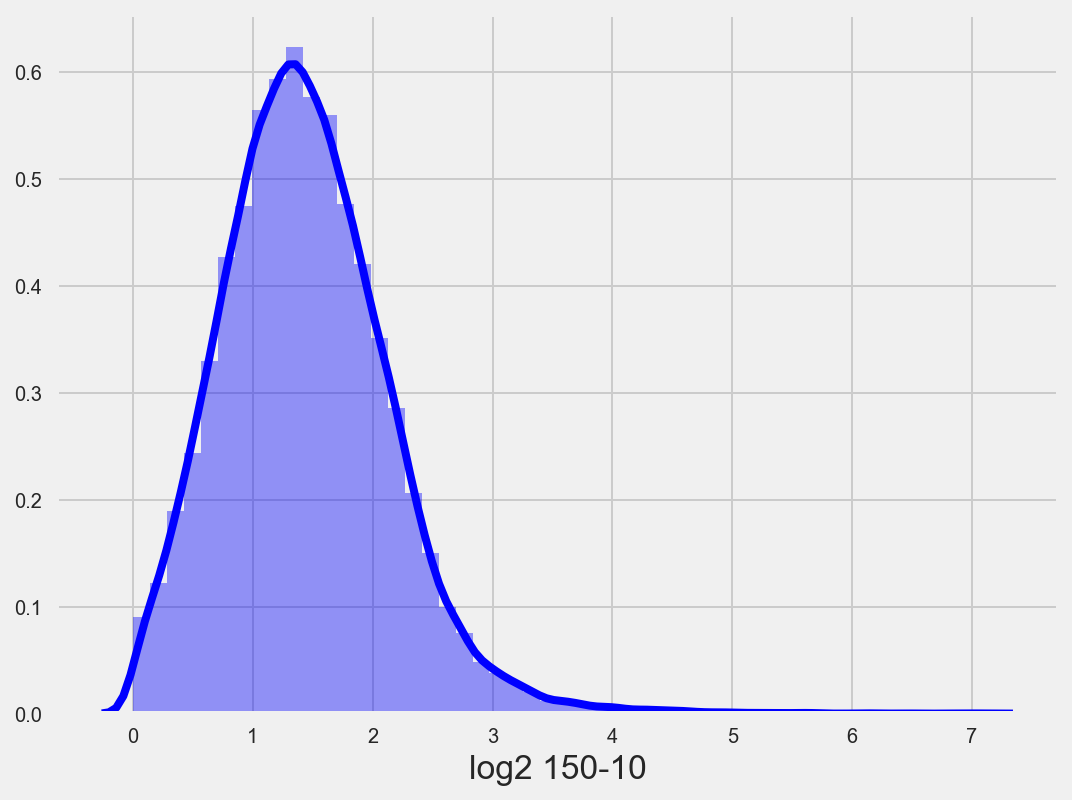

In [49]:
sns.distplot(density_df["log2 150-10"])

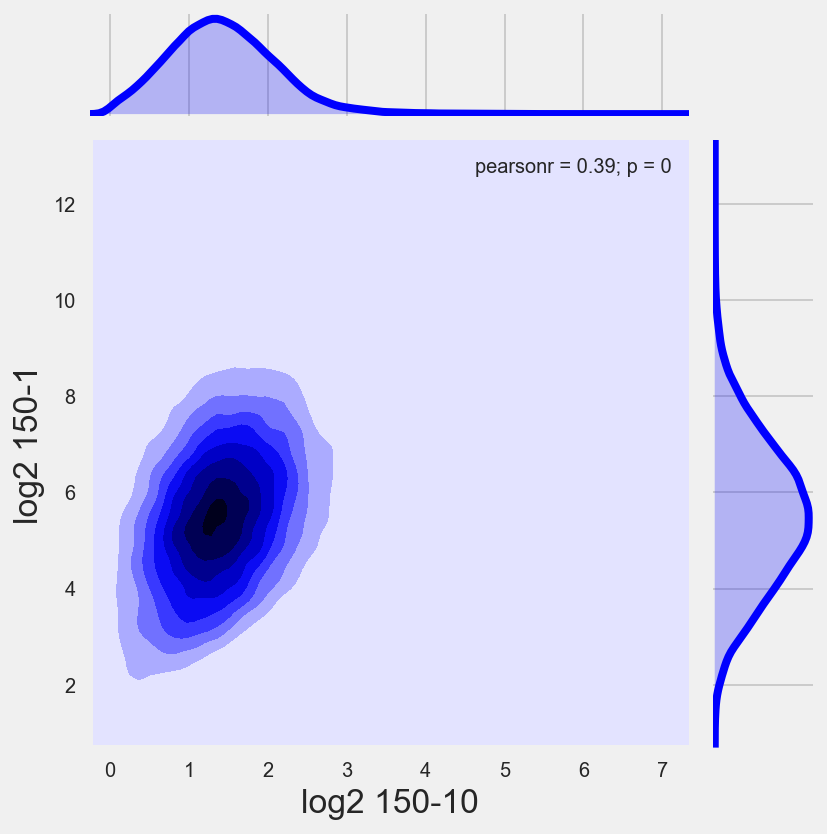

In [74]:
sns.jointplot(x="log2 150-10",y="log2 150-1", data=density_df,kind='kde')


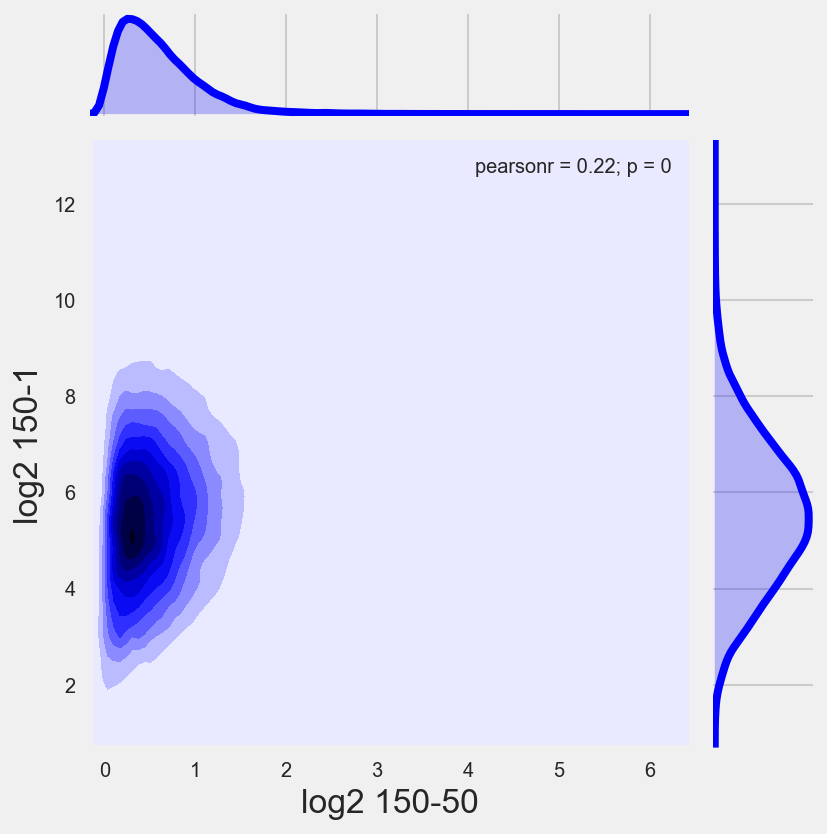

In [75]:
sns.jointplot(x="log2 150-50",y="log2 150-1", data=density_df,kind='kde')

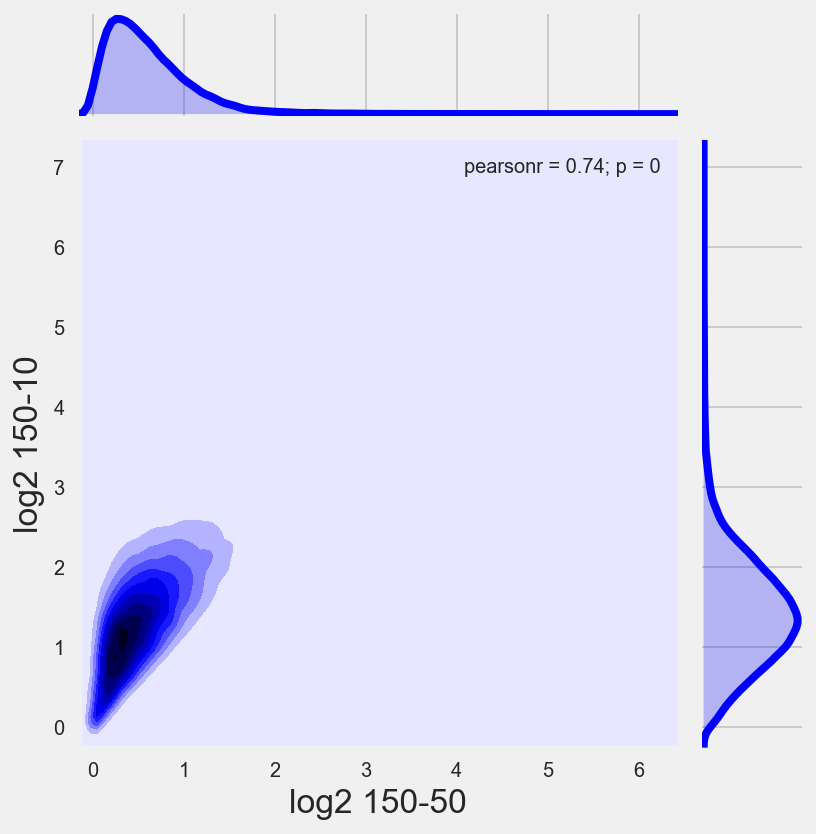

In [76]:
sns.jointplot(x="log2 150-50",y="log2 150-10", data=density_df,kind='kde')

In [78]:
density_df.head()

,Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,5,1,10,20,50,150,log2 150-10,log2 150-1,log2 50-5,log2 150-5,log2 150-50
PeakID (cmd=annotatePeaks.pl /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f04_peaks/trim_CHO_GROCap2_and_trim_CHO_GRO2_bg_2.peak /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -size 5 -len 0 -norm 1e6 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap2),,,,,,,,,,,,,,,,,
NW_020822567.1-1,NW_020822567.1,9245193,9245198,-,843.5,0.959,789.93,272.15,816.86,826.28,830.37,843.18,0.045752,1.631439,0.072030,0.094116,0.022086
NW_020822603.1-1,NW_020822603.1,6596097,6596102,-,621.7,0.890,420.34,67.36,589.23,609.01,612.68,621.73,0.077457,3.206324,0.543577,0.564731,0.021154
NW_020822519.1-1,NW_020822519.1,30535385,30535390,+,536.8,0.896,463.37,2.69,482.73,483.38,484.50,501.68,0.055551,7.543017,0.064332,0.114603,0.050271
NW_020822601.1-1,NW_020822601.1,37658520,37658525,-,510.5,0.871,438.12,15.09,489.33,504.00,508.87,511.61,0.064237,5.083380,0.215971,0.223718,0.007747
NW_020822526.1-1,NW_020822526.1,20909150,20909155,+,501.7,0.980,360.68,2.60,485.24,490.49,497.50,501.68,0.048069,7.592112,0.463977,0.476048,0.012071


In [84]:
density_df['log2 5-1'] = (np.log2((density_df.loc[:,5])/(density_df.loc[:,1])))
density_df['log2 10-1'] = (np.log2((density_df.loc[:,10])/(density_df.loc[:,1])))
density_df['log2 20-1'] = (np.log2((density_df.loc[:,20])/(density_df.loc[:,1])))

density_df['log2 10-5'] = (np.log2((density_df.loc[:,10])/(density_df.loc[:,5])))
density_df['log2 50-5'] = (np.log2((density_df.loc[:,50])/(density_df.loc[:,5])))

density_df['log2 10-5'] = (np.log2((density_df.loc[:,10])/(density_df.loc[:,5])))
density_df['log2 20-5'] = (np.log2((density_df.loc[:,20])/(density_df.loc[:,5])))


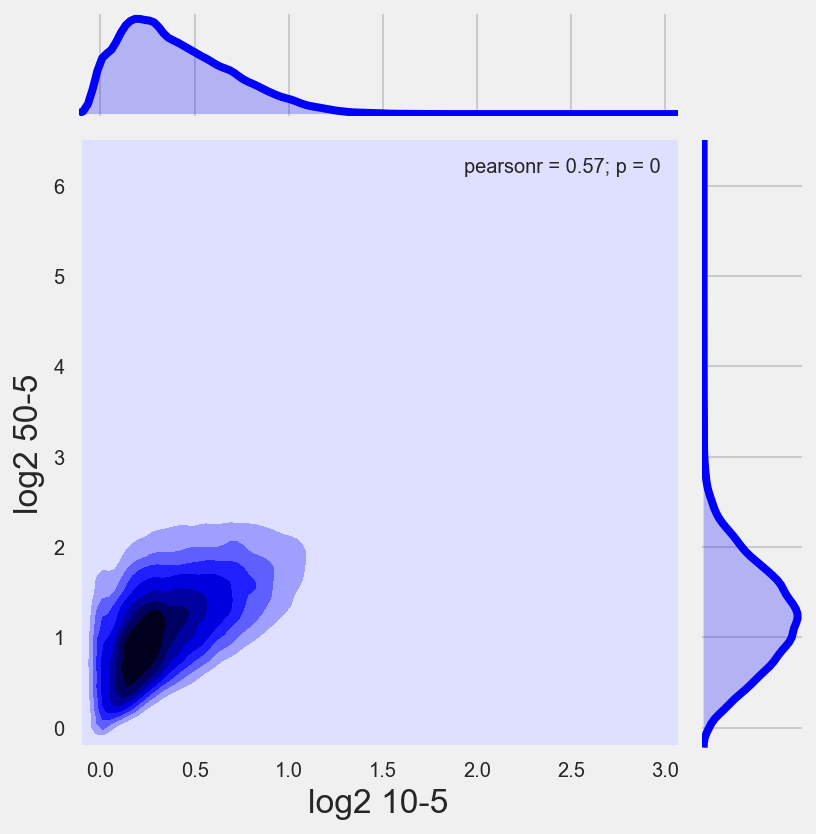

In [80]:
sns.jointplot(x='log2 10-5',y='log2 50-5', data=density_df,kind='kde')

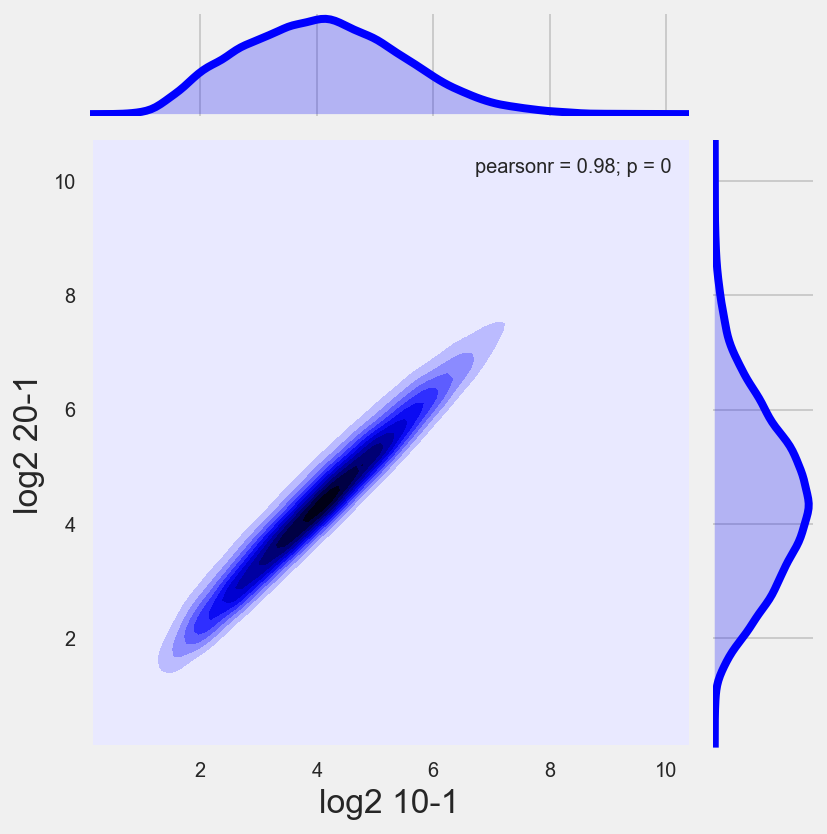

In [83]:
sns.jointplot(x='log2 10-1',y='log2 20-1', data=density_df,kind='kde')

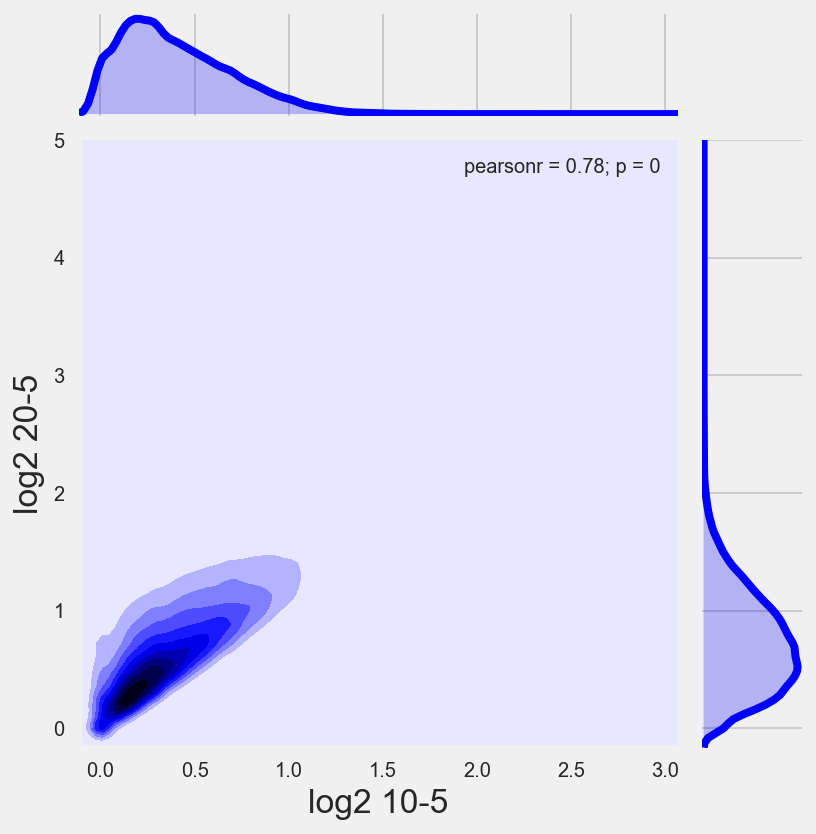

In [85]:
sns.jointplot(x='log2 10-5',y='log2 20-5', data=density_df,kind='kde')